# NaN Pattern Comparison Report

This report shows representative examples of files with NaN pattern differences between datasets.
Files are grouped by model + variable, and one representative file per group is shown (up to 10 total).

In [1]:
# Parameters (injected by papermill)
selected_files = []
shapefile_path = "../shp/ecos.shp"
qc_utils_path = ""

In [2]:
# Parameters
selected_files = [{"filename": "cffdrs_CNRM-CM6-1-HR_2076.nc", "ref_path": "/import/beegfs/CMIP6/jdpaul3/boreal_fire_weather_data/original_dataset/cffdrs/CNRM-CM6-1-HR/cffdrs_CNRM-CM6-1-HR_2076.nc", "new_path": "/import/beegfs/CMIP6/jdpaul3/boreal_fire_weather_data/output_shpmask_hursmin_clip/cffdrs/CNRM-CM6-1-HR/cffdrs_CNRM-CM6-1-HR_2076.nc", "analysis": {"total_nan_diff": 1609242, "worst_timestep": 364, "worst_timestep_count": 4686, "n_timesteps": 365, "variables": ["ffmc", "dmc", "dc", "isi", "bui", "fwi"], "mean_nan_diff_per_timestep": 4408.882191780822, "timesteps_with_diffs": 365}, "group": "CNRM-CM6-1-HR_ffmc", "group_size": 114}, {"filename": "cffdrs_MRI-ESM2-0_2070.nc", "ref_path": "/import/beegfs/CMIP6/jdpaul3/boreal_fire_weather_data/original_dataset/cffdrs/MRI-ESM2-0/cffdrs_MRI-ESM2-0_2070.nc", "new_path": "/import/beegfs/CMIP6/jdpaul3/boreal_fire_weather_data/output_shpmask_hursmin_clip/cffdrs/MRI-ESM2-0/cffdrs_MRI-ESM2-0_2070.nc", "analysis": {"total_nan_diff": 1412148, "worst_timestep": 159, "worst_timestep_count": 5034, "n_timesteps": 365, "variables": ["ffmc", "dmc", "dc", "isi", "bui", "fwi"], "mean_nan_diff_per_timestep": 3868.8986301369864, "timesteps_with_diffs": 338}, "group": "MRI-ESM2-0_ffmc", "group_size": 120}, {"filename": "cffdrs_EC-Earth3-Veg_2089.nc", "ref_path": "/import/beegfs/CMIP6/jdpaul3/boreal_fire_weather_data/original_dataset/cffdrs/EC-Earth3-Veg/cffdrs_EC-Earth3-Veg_2089.nc", "new_path": "/import/beegfs/CMIP6/jdpaul3/boreal_fire_weather_data/output_shpmask_hursmin_clip/cffdrs/EC-Earth3-Veg/cffdrs_EC-Earth3-Veg_2089.nc", "analysis": {"total_nan_diff": 166848, "worst_timestep": 363, "worst_timestep_count": 486, "n_timesteps": 365, "variables": ["ffmc", "dmc", "dc", "isi", "bui", "fwi"], "mean_nan_diff_per_timestep": 457.1178082191781, "timesteps_with_diffs": 357}, "group": "EC-Earth3-Veg_ffmc", "group_size": 58}, {"filename": "cffdrs_MPI-ESM1-2-HR_1988.nc", "ref_path": "/import/beegfs/CMIP6/jdpaul3/boreal_fire_weather_data/original_dataset/cffdrs/MPI-ESM1-2-HR/cffdrs_MPI-ESM1-2-HR_1988.nc", "new_path": "/import/beegfs/CMIP6/jdpaul3/boreal_fire_weather_data/output_shpmask_hursmin_clip/cffdrs/MPI-ESM1-2-HR/cffdrs_MPI-ESM1-2-HR_1988.nc", "analysis": {"total_nan_diff": 119619, "worst_timestep": 119, "worst_timestep_count": 486, "n_timesteps": 365, "variables": ["ffmc", "dmc", "dc", "isi", "bui", "fwi"], "mean_nan_diff_per_timestep": 327.72328767123287, "timesteps_with_diffs": 248}, "group": "MPI-ESM1-2-HR_ffmc", "group_size": 48}]
qc_utils_path = "/import/home/jdpaul3/boreal_fire_weather/processing/qc"
shapefile_path = "shp/ecos.shp"


In [3]:
import sys

if qc_utils_path and qc_utils_path not in sys.path:
    sys.path.insert(0, qc_utils_path)

import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd
from pathlib import Path
import warnings

warnings.filterwarnings("ignore")

print(f"Analyzing {len(selected_files)} representative file(s)")

Analyzing 4 representative file(s)


## Overview Statistics

Summary of NaN pattern analysis across all files.

In [4]:
# Calculate overview statistics
if not selected_files:
    print("No files with NaN differences.")
else:
    total_groups = len(set(f["group"] for f in selected_files))
    total_nan_diffs = sum(f["analysis"]["total_nan_diff"] for f in selected_files)

    print(f"Total model+variable groups with differences: {total_groups}")
    print(f"Representative files shown: {len(selected_files)} (max 10)")
    print(f"Total NaN differences in shown files: {total_nan_diffs:,}")
    print(
        f"\\nNote: Each file represents a group. Files in the same group have similar NaN patterns."
    )

Total model+variable groups with differences: 4
Representative files shown: 4 (max 10)
Total NaN differences in shown files: 3,307,857
\nNote: Each file represents a group. Files in the same group have similar NaN patterns.


## Summary by Group

Detailed statistics grouped by model + variable.

In [5]:
# Create summary table
if selected_files:
    table_data = []
    for f in selected_files:
        model, var = f["group"].split("_", 1)
        table_data.append(
            {
                "Model": model,
                "Variable": var,
                "Files in Group": f["group_size"],
                "Representative File": f["filename"],
                "Total NaN Diffs": f["analysis"]["total_nan_diff"],
                "Timesteps": f["analysis"]["n_timesteps"],
                "Timesteps with Diffs": f["analysis"]["timesteps_with_diffs"],
                "Worst Timestep Diff": f["analysis"]["worst_timestep_count"],
            }
        )

    df = pd.DataFrame(table_data)
    df = df.sort_values("Total NaN Diffs", ascending=False)

    print(df.to_string(index=False))
else:
    print("No data to display.")

        Model Variable  Files in Group          Representative File  Total NaN Diffs  Timesteps  Timesteps with Diffs  Worst Timestep Diff
CNRM-CM6-1-HR     ffmc             114 cffdrs_CNRM-CM6-1-HR_2076.nc          1609242        365                   365                 4686
   MRI-ESM2-0     ffmc             120    cffdrs_MRI-ESM2-0_2070.nc          1412148        365                   338                 5034
EC-Earth3-Veg     ffmc              58 cffdrs_EC-Earth3-Veg_2089.nc           166848        365                   357                  486
MPI-ESM1-2-HR     ffmc              48 cffdrs_MPI-ESM1-2-HR_1988.nc           119619        365                   248                  486


## NaN Pattern Visualizations

For each representative file, showing the timestep with the greatest NaN pattern difference.

\n[1/4] CNRM-CM6-1-HR_ffmc: cffdrs_CNRM-CM6-1-HR_2076.nc
  Total NaN differences: 1,609,242
  Showing timestep 364 with 4,686 differences


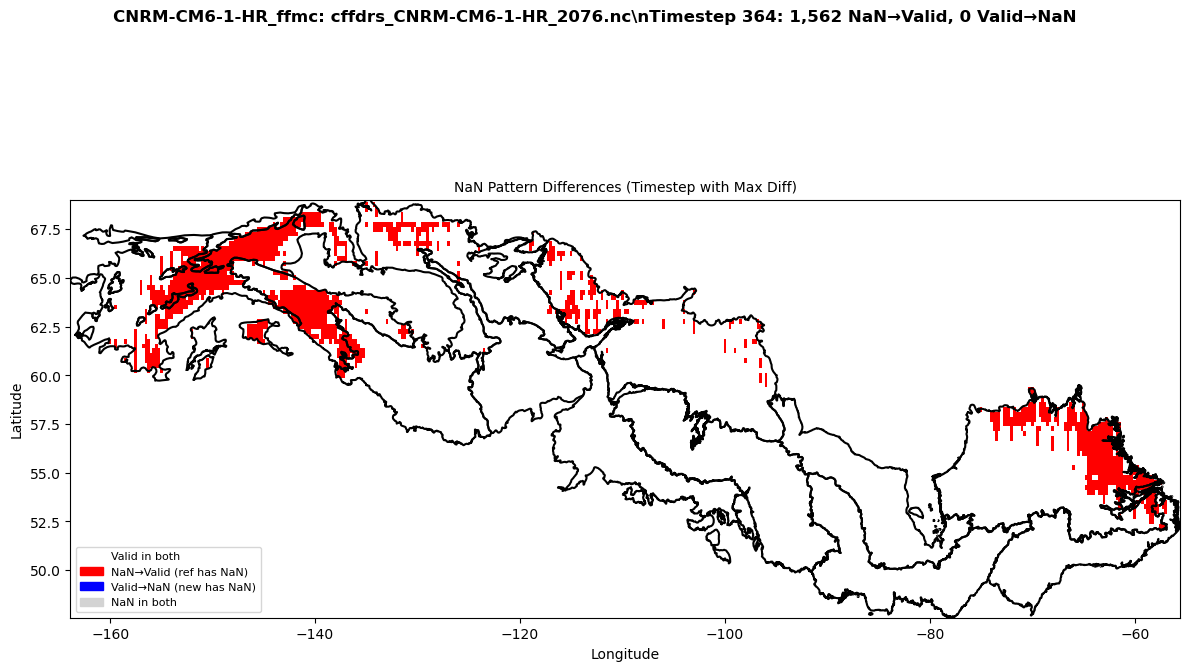

\n[2/4] MRI-ESM2-0_ffmc: cffdrs_MRI-ESM2-0_2070.nc
  Total NaN differences: 1,412,148
  Showing timestep 159 with 5,034 differences


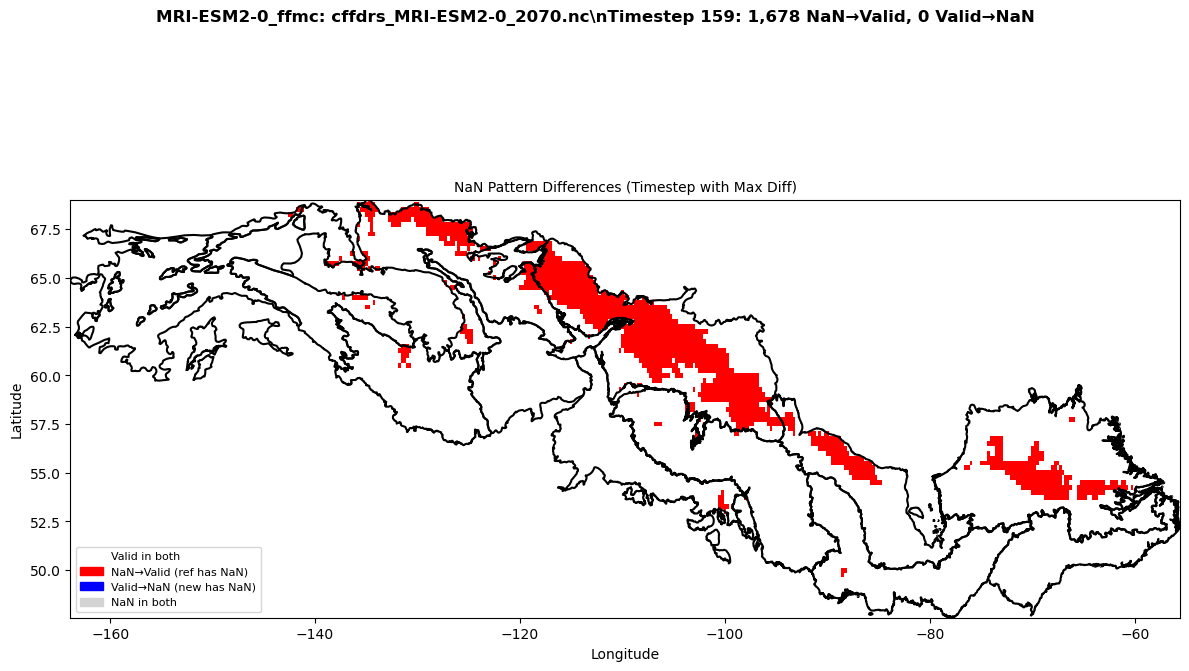

\n[3/4] EC-Earth3-Veg_ffmc: cffdrs_EC-Earth3-Veg_2089.nc
  Total NaN differences: 166,848
  Showing timestep 363 with 486 differences


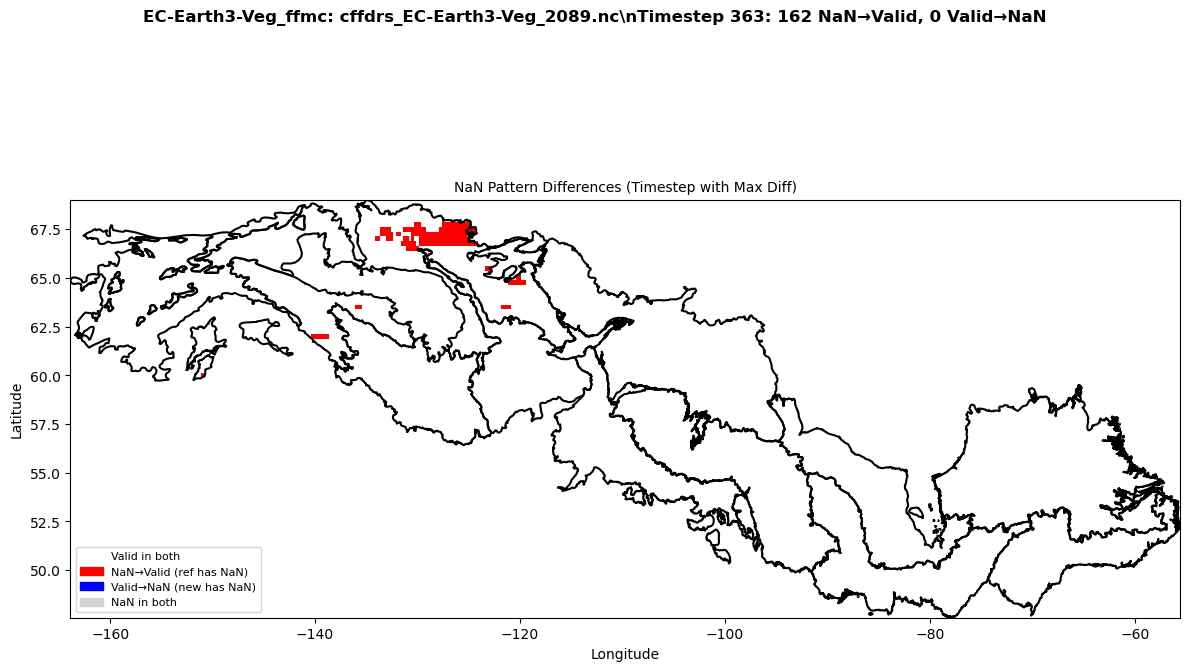

\n[4/4] MPI-ESM1-2-HR_ffmc: cffdrs_MPI-ESM1-2-HR_1988.nc
  Total NaN differences: 119,619
  Showing timestep 119 with 486 differences


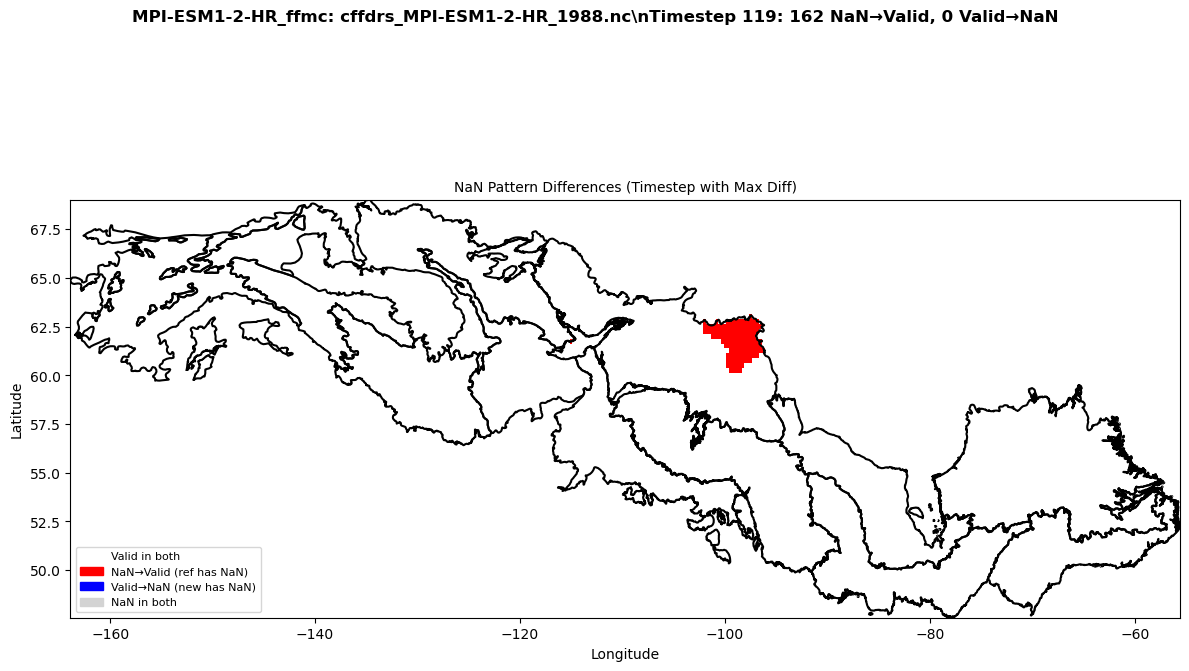

In [6]:
# Load shapefile if available
if Path(shapefile_path).exists():
    gdf = gpd.read_file(shapefile_path)
    bounds = gdf.total_bounds
else:
    print(f"Warning: Shapefile not found at {shapefile_path}")
    gdf = None
    bounds = None

# Plot each selected file
for i, file_info in enumerate(selected_files, 1):
    print(
        f"\\n[{i}/{len(selected_files)}] {file_info['group']}: {file_info['filename']}"
    )
    print(f"  Total NaN differences: {file_info['analysis']['total_nan_diff']:,}")
    print(
        f"  Showing timestep {file_info['analysis']['worst_timestep']} with {file_info['analysis']['worst_timestep_count']:,} differences"
    )

    try:
        # Load datasets
        ds_ref = xr.open_dataset(file_info["ref_path"])
        ds_new = xr.open_dataset(file_info["new_path"])

        # Get first variable
        var = file_info["analysis"]["variables"][0]
        time_idx = file_info["analysis"]["worst_timestep"]

        # Extract data for worst timestep
        if "time" in ds_ref.dims and len(ds_ref.time) > 1:
            data_ref = ds_ref[var].isel(time=time_idx).values
            data_new = ds_new[var].isel(time=time_idx).values
            time_val = ds_ref.time.values[time_idx]
        else:
            data_ref = ds_ref[var].values
            data_new = ds_new[var].values
            time_val = "N/A"

        # Create NaN pattern mask
        nan_ref = np.isnan(data_ref)
        nan_new = np.isnan(data_new)
        nan_pattern = np.zeros_like(data_ref)
        nan_pattern[nan_ref & ~nan_new] = 1  # NaN in ref only
        nan_pattern[~nan_ref & nan_new] = 2  # NaN in new only
        nan_pattern[nan_ref & nan_new] = 3  # NaN in both

        # Get coordinates
        lon = ds_ref.lon.values
        lat = ds_ref.lat.values

        if bounds is None:
            bounds = [lon.min(), lat.min(), lon.max(), lat.max()]

        # Create plot
        fig, ax = plt.subplots(1, 1, figsize=(12, 8))

        # Count differences
        n_nan_to_valid = np.sum(nan_ref & ~nan_new)
        n_valid_to_nan = np.sum(~nan_ref & nan_new)

        fig.suptitle(
            f"{file_info['group']}: {file_info['filename']}\\n"
            f"Timestep {time_idx}: {n_nan_to_valid:,} NaN→Valid, {n_valid_to_nan:,} Valid→NaN",
            fontsize=12,
            fontweight="bold",
        )

        # Plot NaN pattern
        colors = ["white", "red", "blue", "lightgray"]
        labels = [
            "Valid in both",
            "NaN→Valid (ref has NaN)",
            "Valid→NaN (new has NaN)",
            "NaN in both",
        ]
        im = ax.pcolormesh(
            lon,
            lat,
            nan_pattern,
            cmap=plt.cm.colors.ListedColormap(colors),
            vmin=0,
            vmax=3,
        )

        if gdf is not None:
            gdf.boundary.plot(ax=ax, edgecolor="black", linewidth=1.5)

        ax.set_xlim(bounds[0], bounds[2])
        ax.set_ylim(bounds[1], bounds[3])
        ax.set_xlabel("Longitude", fontsize=10)
        ax.set_ylabel("Latitude", fontsize=10)
        ax.set_title(f"NaN Pattern Differences (Timestep with Max Diff)", fontsize=10)

        # Legend
        patches = [mpatches.Patch(color=colors[j], label=labels[j]) for j in range(4)]
        ax.legend(handles=patches, loc="lower left", fontsize=8)

        plt.tight_layout()
        plt.show()

        ds_ref.close()
        ds_new.close()

    except Exception as e:
        print(f"  ERROR: {str(e)}")
        continue

## Summary

This report analyzed representative files from each model+variable group that showed NA pattern differences. Files within the same group exhibit similar NaN patterns and are therefore not all shown to keep the report concise.

**Key Points:**
- Each visualization represents one model+variable combination
- The timestep shown is the one with the maximum NaN pattern difference
- Red areas: Original had NaN, new has valid data
- Blue areas: Original had valid data, new has NaN
- Gray areas: Both datasets have NaN